In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import pandas as pd

In [ ]:
imagenet_classes = pd.read_json("imagenet_class_index.json")
imagenet_classes = imagenet_classes.T[[1]]                                       # Here transpose of imagenet classes taken for vertical column.
imagenet_classes.columns = ["Class"]
imagenet_classes

Class
0                tench
1             goldfish
2    great_white_shark
3          tiger_shark
4           hammerhead
..                 ...
995          earthstar
996   hen-of-the-woods
997             bolete
998                ear
999      toilet_tissue

[1000 rows x 1 columns]

In [ ]:
pretrained_model = VGG16()

553467096/553467096 [==============================] - 17s 0us/step


In [ ]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Generate Predictions - using the pretrained model

In [ ]:
imagenet_classes.head(10)

Class
0              tench
1           goldfish
2  great_white_shark
3        tiger_shark
4         hammerhead
5       electric_ray
6           stingray
7               cock
8                hen
9            ostrich

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

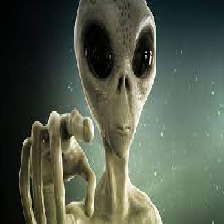

In [ ]:
image_for_classification = load_img("Alien.jpeg",
                                    target_size=(224,224))
image_for_classification

In [ ]:
image_for_classification = np.array(image_for_classification)
image_for_classification = preprocess_input(image_for_classification)
image_for_classification = image_for_classification.reshape(1, 224, 224, 3)

In [ ]:
preds = pretrained_model.predict(image_for_classification)
imagenet_classes["probability"] = np.round(preds.flatten(), 3)
imagenet_classes.sort_values(by="probability", ascending=False)

1/1 [==============================] - 1s 1s/step


Class  probability
616           knot        0.216
562       fountain        0.191
600           hook        0.141
488          chain        0.083
23         vulture        0.044
..             ...          ...
365      orangutan        0.000
366        gorilla        0.000
367     chimpanzee        0.000
369        siamang        0.000
999  toilet_tissue        0.000

[1000 rows x 2 columns]